515
<class 'pandas.core.series.Series'>
(-1.0738235905624562, 0.7253970883059093, 0, 514, {'1%': -3.443136494643789, '5%': -2.8671794725841147, '10%': -2.5697736283668187}, 4910.114128894005)
(-1.0738235905624562, 0.7253970883059093, 0, 514, {'1%': -3.443136494643789, '5%': -2.8671794725841147, '10%': -2.5697736283668187}, 4910.114128894005)
(array([505.19920251]), array([7.02652088e-112]))


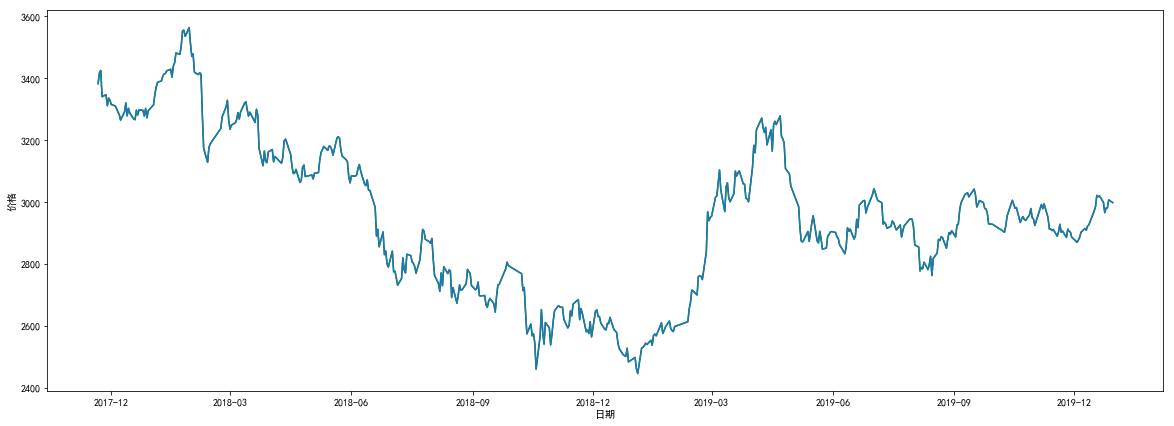

509
6
               open
date               
2019-12-23  2999.04
2019-12-24  2965.83
2019-12-25  2980.43
2019-12-26  2981.25
2019-12-27  3006.85
2019-12-30  2998.17


D:\Python\lib\site-packages\scipy\signal\signaltools.py:1026: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Python\lib\site-packages\scipy\signal\signaltools.py:1029: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\Python\lib\site-packages\scipy\signal\signaltools.py:1035: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will res

{'aic':              0            1            2            3
0  7139.535391  6500.093156  7432.707288  6949.585579
1  5099.616020  5101.298628  5103.138870  5102.137422
2  5101.309283          NaN  5097.163648  5104.091891
3  5103.190124  5097.147947  5099.186491  5100.944574, 'bic':              0            1            2            3
0  7148.023724  6512.825657  7449.683956  6970.806414
1  5112.348521  5118.275296  5124.359705  5127.602424
2  5118.285951          NaN  5122.628649  5133.801059
3  5124.410958  5122.612948  5128.895660  5134.897909, 'hqic':              0            1            2            3
0  7142.861982  6505.083042  7439.360470  6957.902057
1  5104.605906  5107.951810  5111.455347  5112.117195
2  5107.962465          NaN  5107.143421  5115.734959
3  5111.506601  5107.127719  5110.829560  5114.250938, 'aic_min_order': (3, 1), 'bic_min_order': (1, 0), 'hqic_min_order': (1, 0)}
AIC:5040.2733


D:\Python\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\Python\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


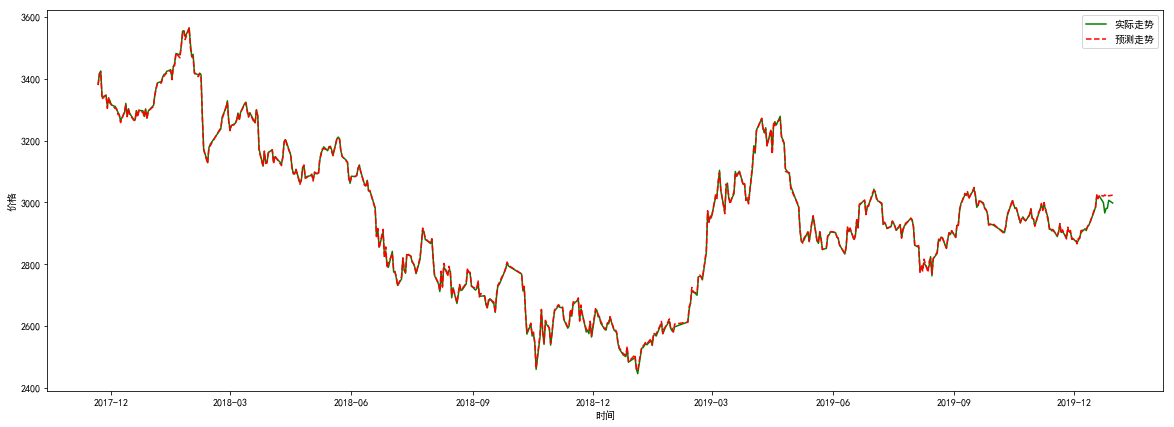

511    3024.060499
512    3020.731187
513    3023.770140
514    3021.135648
515    3023.554341
dtype: float64
               open
date               
2019-12-24  2965.83
2019-12-25  2980.43
2019-12-26  2981.25
2019-12-27  3006.85
2019-12-30  2998.17
39.169844347112196


In [4]:
# -*- coding: utf-8 -*-
#用ARMA进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
import tushare as ts
import numpy as np
from datetime import datetime
from statsmodels.tsa.stattools import adfuller #ADF检验
from statsmodels.stats.diagnostic import acorr_ljungbox #白噪声检验
import statsmodels.tsa.stattools as st
from sklearn.metrics import mean_squared_error
import math
#引入数据，并重新排序
data=ts.get_hist_data('sh',ktype='d',start='2017-11-01',end='2019-12-30')
df=data.open
print(len(df))
print(type(df))

#检测是否平稳--（1）1%、%5、%10不同程度拒绝原假设的统计值和ADF Test result的比较，ADF Test result同时小于1%、5%、10%即说明非常好地拒绝该假设，本数据中，adf结果为-6.9， 小于三个level的统计值。
x = np.array(df)
adftest = adfuller(x, autolag='AIC')
print (adftest)

#差分，实现序列的平稳性
#df = df.diff(1).dropna()

#检测是否平稳--（1）1%、%5、%10不同程度拒绝原假设的统计值和ADF Test result的比较，ADF Test result同时小于1%、5%、10%即说明非常好地拒绝该假设，本数据中，adf结果为-6.9， 小于三个level的统计值。
x = np.array(df)
adftest = adfuller(x, autolag='AIC')
print (adftest)

#非白噪检测
p_value = acorr_ljungbox(data.open,lags=1) 
print (p_value)

#数据倒序
df=df.sort_index(axis=0)

#添加时间标签的方法
#d=str(1801+len(data_open)-1)
#data_index = sm.tsa.datetools.dates_from_range('1801',d)

#其他方法
data_open=df.to_frame()

data_open.index  = pd.to_datetime(data_open.index)

#使用原本数据的时间标签
#data_index=[]
#for da in data_open.index:
#    data_index.append(datetime.strptime(da,'%Y-%m-%d'))
    #print(datetime.strptime(da,'%Y-%m-%d'))
    #print(type(datetime.strptime(da,'%Y-%m-%d')))
#data_index = pd.to_datetime(data.index)
#data_open.index = data_index
#print(data_open.index)


plt.xlabel("日期") 
plt.ylabel("价格") 
plt.plot(data_open.index,df) 
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.show()

data_t=data_open[:-6]
data_p=data_open[-6:]
print(len(data_t))
print(len(data_p))
print(data_p)
order = st.arma_order_select_ic(data_open,max_ar=3,max_ma=3,ic=['aic', 'bic', 'hqic'])
print(order)


#创建ARMA模型
arma = ARMA(data_t,(2,1)).fit()

print('AIC:%0.4lf'%arma.aic)

#模型预测

predict_y = arma.predict(start=1,end=515)
#print(predict_y)
#sprepredict_y=np.array(predict_y.values,dtype=np.float) 
#sprepredict_y.index=data.index
#一阶差分复原
#diff_shift_ts = ts_diff_1.shift(1)
#predict_yy = predict_y.add(diff_shift_ts)
#预测结果绘制

plt.figure(figsize=(20,7))
plt.plot(data_open.index, data_open, color='green',label='实际走势')
plt.plot(data_open.index, predict_y, color='red',ls='--',label='预测走势')
# 输出预测金额
plt.xlabel('时间')
plt.ylabel('价格')
plt.legend()
plt.show()
#data_t.plot(color='black',label='实际价格')
#plt.show()
#predict_y.plot(color='red',ls='--',label='预测价格')
#plt.show()
print(predict_y[-5:])
print(data_open[-5:])
rmse = math.sqrt(mean_squared_error(data_open[-5:],predict_y[-5:]))
print(rmse)

90
DatetimeIndex(['1901-12-31', '1902-12-31', '1903-12-31', '1904-12-31',
               '1905-12-31', '1906-12-31', '1907-12-31', '1908-12-31',
               '1909-12-31', '1910-12-31', '1911-12-31', '1912-12-31',
               '1913-12-31', '1914-12-31', '1915-12-31', '1916-12-31',
               '1917-12-31', '1918-12-31', '1919-12-31', '1920-12-31',
               '1921-12-31', '1922-12-31', '1923-12-31', '1924-12-31',
               '1925-12-31', '1926-12-31', '1927-12-31', '1928-12-31',
               '1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31', '1935-12-31', '1936-12-31',
               '1937-12-31', '1938-12-31', '1939-12-31', '1940-12-31',
               '1941-12-31', '1942-12-31', '1943-12-31', '1944-12-31',
               '1945-12-31', '1946-12-31', '1947-12-31', '1948-12-31',
               '1949-12-31', '1950-12-31', '1951-12-31', '1952-12-31',
               '1953-12-31', '1954-12-31', '1955-12-31', '1956-12-31',
   

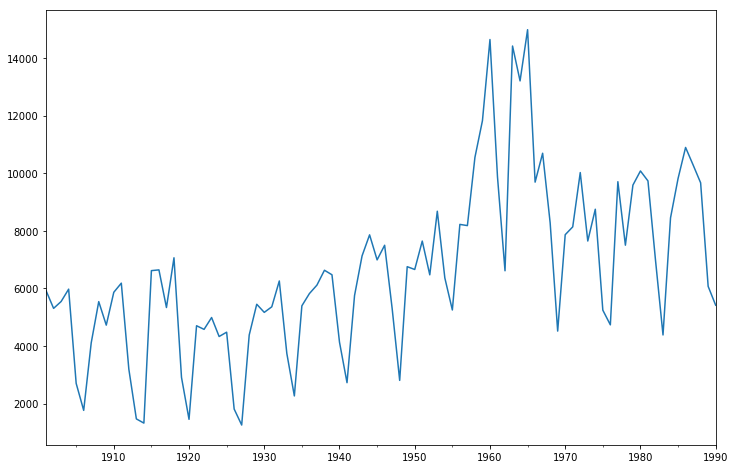

D:\Python\lib\site-packages\scipy\signal\signaltools.py:1026: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Python\lib\site-packages\scipy\signal\signaltools.py:1029: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\Python\lib\site-packages\scipy\signal\signaltools.py:1035: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will res

AIC:1619.6323
1990-12-31    5256.534127
1991-12-31    7205.485950
1992-12-31    8577.877217
1993-12-31    9628.803413
1994-12-31    9596.630474
1995-12-31    9191.441983
1996-12-31    7399.505948
1997-12-31    6337.376923
1998-12-31    6873.260580
1999-12-31    7793.478193
2000-12-31    8664.546168
Freq: A-DEC, dtype: float64


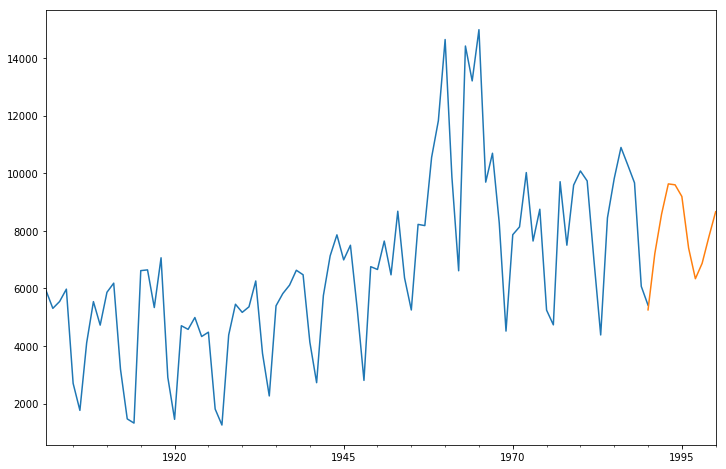

In [33]:
# -*- coding: utf-8 -*-
#用ARMA进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot

#创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
print(len(data))
data=np.array(data,dtype=np.float) 
data = pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')

#绘制数据图

data.index = pd.Index(data_index)
print(data.index)
data.plot(figsize=(12,8))
plt.show()
#创建ARMA模型
arma = ARMA(data,(7,0)).fit()
print('AIC:%0.4lf'%arma.aic)
#模型预测
predict_y = arma.predict('1990','2000')
print(predict_y)
#预测结果绘制
fig,ax = plt.subplots(figsize=(12,8))
ax = data.ix['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()